## data treatment

In [106]:
%pylab inline
import h5py
from glob import glob

Populating the interactive namespace from numpy and matplotlib


C:\UsersPrograms\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['mod']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [143]:

def loadMCHD(fname):
    # npz file read
    if '.npz' in fname:
        datas=np.load(fname)
        res=datas['res']
        ttlin=datas['ttlin']
        tstamps=datas['tstamps']
    # Hdf5 file read
    elif '.hdf5' in fname or '.h5' in fname: 
        hf=h5py.File(fname, "r")
        res=hf['Scan']['Spectrums'][:]
        ttlin=hf['Scan']['TTLinput'][:]
        tstamps=hf['Scan'].attrs['Timestamps']
    else:
        return "error","error"
    delta=mean(res*(ttlin-1),axis=1)
    sigma=mean(res,axis=1)
    sdelta=sum(res*(ttlin-1),axis=1)
    ssigma=sum(res,axis=1)
    print(f"""Data size={shape(res)}, 
    Samples pos {shape(np.where((ttlin-1)==1))[1]}, 
    Samples neg {shape(np.where((ttlin-1)==-1))[1]},
    Dicarded samples {shape(np.where((ttlin-1)==0))[1]},
    Edges {shape(np.where(diff(ttlin)>=1))[1]}""")
    return sigma,delta

In [67]:
%%time
fname=r'\\data\OPENDATA\Instrumentation\Chirality\MChD\MChD-python\run30000-low3b.npz'
sigma,delta=loadMCHD(fname)

Data size=(2048, 30000), 
    Samples pos 14396, 
    Samples neg 14405,
    Dicarded samples 1199,
    Edges 1231
Wall time: 9.37 s


In [68]:
%%time
fname=r'\\data\OPENDATA\Instrumentation\Chirality\MChD\MChD-python\run30000-low3c.h5'
sigma,delta=loadMCHD(fname)

Data size=(2048, 30000), 
    Samples pos 14396, 
    Samples neg 14405,
    Dicarded samples 1199,
    Edges 1231
Wall time: 2.46 s


In [141]:
def pltMCHD(sigma,delta, label=''):
    fig=figure()
    plot(delta,'r',label=label+r'- $\delta$')
    xlabel('Pixel Number')
    ylabel('Counts/spectra')
    ylim(bottom=min(min(delta),0))
    twinx()
    plot(sigma,label=label+r'- $\sigma$')
    ylabel('Counts/spectra')
    ylim(bottom=0)
    fig.legend(loc="upper center")
    
    
def statsMCHD(sigma,delta):
    stat={}
    stat['modulation max'] = max(delta)
    stat['modulation energy'] = mean(delta[830:850])
    stat['dc energy'] = mean(sigma[830:850])
    stat['Contrast'] = max(sigma)/max(delta)
    stat['Contrast '] = (mean(sigma[830:850])-mean(sigma[:500]))/mean(delta[830:850])
    stat['Dark count ']=mean(sigma[:500])
    return stat

## Plot all files

In [145]:
specfiles=glob(r'\\data\OPENDATA\Instrumentation\Chirality\MChD\MChD-python\*.npz')\
+glob(r'\\data\OPENDATA\Instrumentation\Chirality\MChD\MChD-python\*.h5')
ress={}

for f in specfiles[:-3]:
    name=f.split(r'MChD-python')[-1]
    print(name)
    sigma,delta=loadMCHD(f)
    ress[name]=(sigma,delta)
    

\run1000.npz
Data size=(2048, 10), 
    Samples pos 5, 
    Samples neg 4,
    Dicarded samples 1,
    Edges 0
\run300-low.npz
Data size=(2048, 300), 
    Samples pos 140, 
    Samples neg 138,
    Dicarded samples 22,
    Edges 22
\run300-low2.npz
Data size=(2048, 300), 
    Samples pos 151, 
    Samples neg 137,
    Dicarded samples 12,
    Edges 14
\run300-low3.npz
Data size=(2048, 300), 
    Samples pos 144, 
    Samples neg 143,
    Dicarded samples 13,
    Edges 12
\run3000-low3.npz
Data size=(2048, 3000), 
    Samples pos 1445, 
    Samples neg 1433,
    Dicarded samples 122,
    Edges 125
\run30000-low.npz
Data size=(2048, 30000), 
    Samples pos 13950, 
    Samples neg 13949,
    Dicarded samples 2101,
    Edges 2123
\run30000-low2.npz
Data size=(2048, 30000), 
    Samples pos 14402, 
    Samples neg 14397,
    Dicarded samples 1201,
    Edges 1232
\run30000-low3.npz
Data size=(2048, 30000), 
    Samples pos 14400, 
    Samples neg 14398,
    Dicarded samples 1202,
    Edges 

\run1000.npz
{'modulation max': 3686.7, 'modulation energy': 3340.19, 'dc energy': 18139.23, 'Contrast': 5.427157078145767, 'Contrast ': 5.121534044470524, 'Dark count ': 1032.3332}


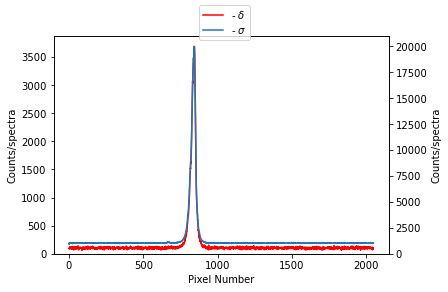

\run300-low.npz
{'modulation max': 230.70333333333335, 'modulation energy': 196.16783333333333, 'dc energy': 17358.592, 'Contrast': 83.02365230960396, 'Contrast ': 83.15828208328413, 'Dark count ': 1045.6119800000001}


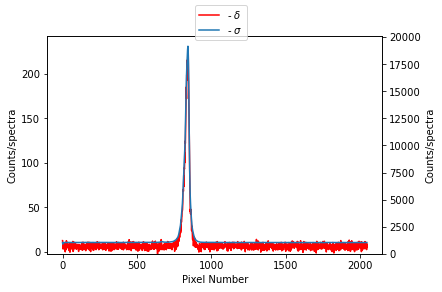

\run300-low2.npz
{'modulation max': 3039.6366666666668, 'modulation energy': 2842.5446666666667, 'dc energy': 59733.22749999998, 'Contrast': 21.087410666406402, 'Contrast ': 20.64413474593304, 'Dark count ': 1051.3523799999998}


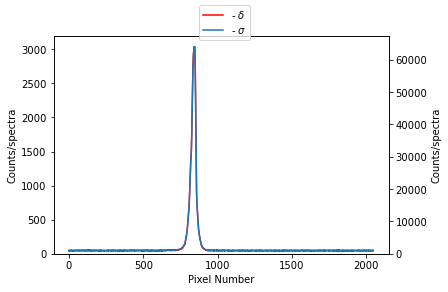

\run300-low3.npz
{'modulation max': 31.653333333333332, 'modulation energy': 25.871, 'dc energy': 3831.772, 'Contrast': 128.75368576242627, 'Contrast ': 107.89136227178437, 'Dark count ': 1040.5145666666667}


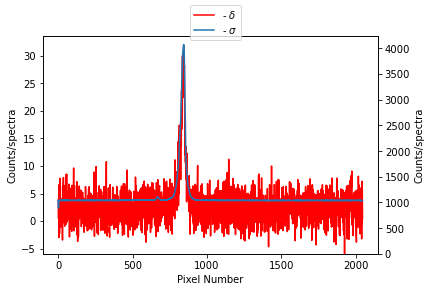

\run3000-low3.npz
{'modulation max': 32.763333333333335, 'modulation energy': 28.892483333333338, 'dc energy': 3822.8423833333336, 'Contrast': 124.18193102044968, 'Contrast ': 96.22966097872052, 'Dark count ': 1042.5285073333334}


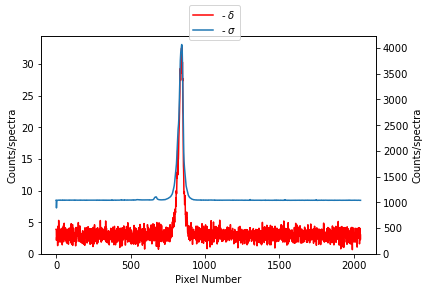

\run30000-low.npz
{'modulation max': 93.4243, 'modulation energy': 83.29570333333334, 'dc energy': 17344.391185, 'Contrast': 204.89614051162278, 'Contrast ': 195.68782378810977, 'Dark count ': 1044.4362687999999}


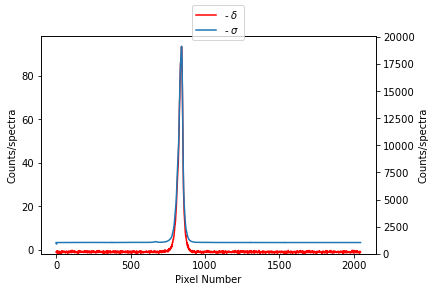

\run30000-low2.npz
{'modulation max': 70.27573333333333, 'modulation energy': 66.61543166666668, 'dc energy': 59868.38445499999, 'Contrast': 913.710962816942, 'Contrast ': 882.9305841691984, 'Dark count ': 1051.5824588666665}


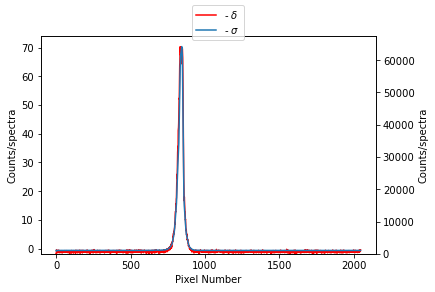

\run30000-low3.npz
{'modulation max': 15.325933333333333, 'modulation energy': 13.823795, 'dc energy': 3827.9269349999995, 'Contrast': 265.4950476099335, 'Contrast ': 201.61674540650134, 'Dark count ': 1040.8183779333333}


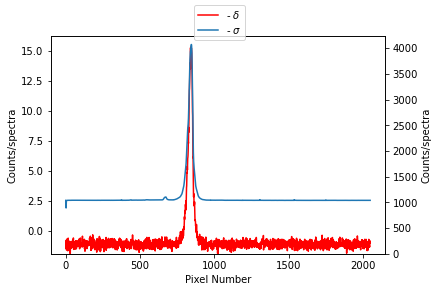

\run30000-low3b.npz
{'modulation max': 14.806666666666667, 'modulation energy': 12.958906666666667, 'dc energy': 3826.919951666666, 'Contrast': 275.0466389013958, 'Contrast ': 214.8522137001269, 'Dark count ': 1042.6701672}


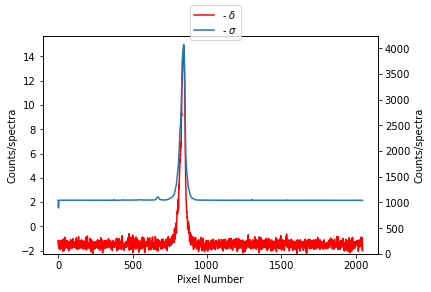

In [149]:
for f in ress:
    print(f)
    sigma,delta=ress[f]
    pltMCHD(sigma,delta)
    print(statsMCHD(sigma,delta))
    plt.show()    

## quick plot(delta)
twinx()
plot(sigma)
print(f'mod={max(delta)}, dc ={max(sigma)} ,contrast={max(sigma)/max(delta)},1/contrast={1/max(sigma)*max(delta)}')

In [102]:
385/0.05,36/0.05

(7700.0, 720.0)

In [104]:
720/204*913

3222.3529411764703

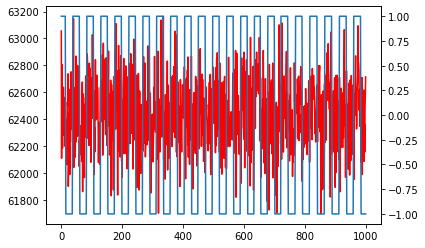

In [63]:
plot(res[840,:1000],'r-')
plt.twinx()
plot(ttlin[:1000]-1,'-')

845

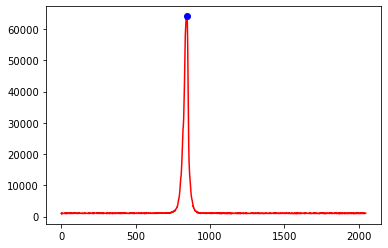

In [64]:
plot(res[:,0],'r')
plot(argmax(res[:,0]),max(res[:,0]),'bo')
argmax(res[:,0])

## DFT calculations

In [65]:
#getting mean sample frequency
Fs=np.timedelta64(1, 's')/diff(tstamps[:,0])[0]*shape(res)[1]
Fs,1/Fs

(47.856125344763505, 0.020895966666666665)

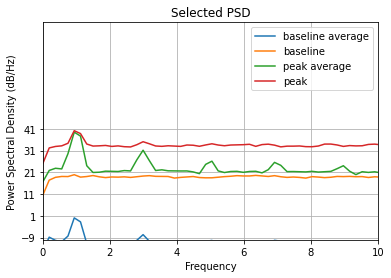

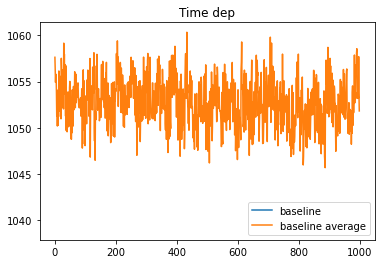

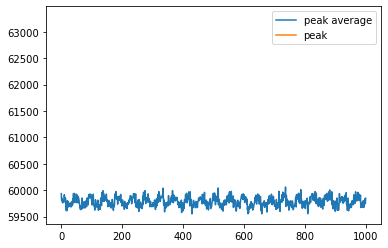

In [66]:
psd(1/2*(mean(res[:500],axis=0) 
        # +        mean(res[2000:,:],axis=0)
        )
    ,Fs=Fs, label='baseline average', detrend='mean');
psd(mean(res[0:1,:],axis=0),Fs=Fs, 
    label='baseline', detrend='mean');
psd(mean(res[830:850,:],axis=0),Fs=Fs,
    label='peak average', detrend='mean');

psd(mean(res[842:843,:],axis=0),Fs=Fs
    , detrend='mean',label='peak');
legend()
title('Selected PSD')
xlim(0,10)
ylim(-10,90)
figure()
title('Time dep')
plot(mean(res[0,:1000],axis=0),label='baseline')
plot(mean(res[0:600,:1000],axis=0),label='baseline average')
legend()
figure()
plot(mean(res[830:850,:1000],axis=0),label='peak average')
plot(mean(res[842,:1000],axis=0),label='peak')
legend()

## timing mean

In [8]:
%timeit mean(res*(ttlin-1),axis=1)

245 ms ± 7.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%timeit average(res,weights=(ttlin-1),axis=1)

243 ms ± 10.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


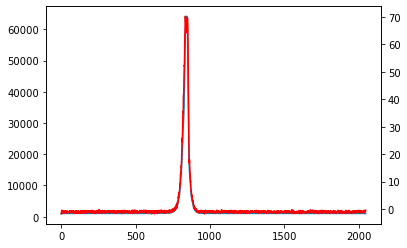

In [73]:
plot(mean(res,axis=1))
twinx()
plot(mean(res*(ttlin-1),axis=1),'r')

In [74]:
# contrast
max(mean(res*(ttlin-1),axis=1))/max(mean(res,axis=1))

0.0010944380013971065

(750.0, 900.0)

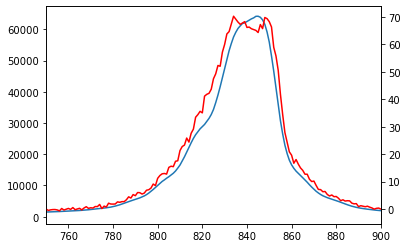

In [91]:
plot(mean(res,axis=1))
twinx()
plot(mean(res*(ttlin-1),axis=1),'r')
xlim(750,900)

(750.0, 900.0)

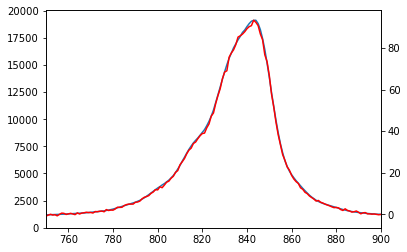

In [93]:
plot(mean(res,axis=1))
twinx()
plot(mean(res*(ttlin-1),axis=1),'r')
xlim(750,900)

In [95]:
100e6/100e3

1000.0

(-10.0, 10.0)

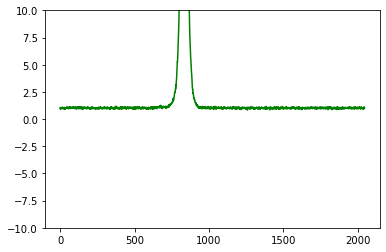

In [61]:
plot(average(res,weights=(ttlin-1),axis=1)/1000,'g')
ylim(-10,10)

## chuncked calculation

(-100.0, 100.0)

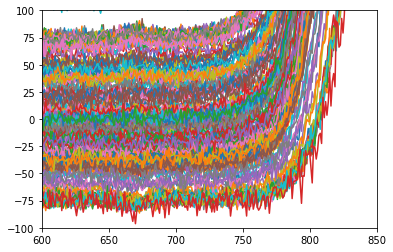

In [13]:

k=14*10
i,j=0,k
while j<30000:
    i+=k
    j+=k
    chunk_res=res[:,i:j]
    chunk_mod=(ttlin-1)[i:j]
    chunk_mean=mean(chunk_res*chunk_mod,axis=1)
    plot(chunk_mean)
xlim(600,850)
ylim(-100,100)

In [14]:
%timeit mean(chunk_res*chunk_mod,axis=1)

156 µs ± 3.29 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [15]:
13*5*0.037


2.405

## Simulate demodulation

In [260]:
spectrum=np.zeros(2048)

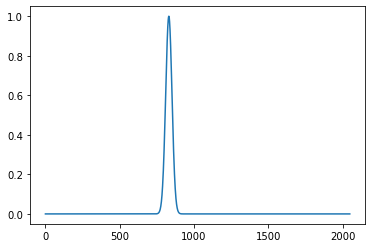

In [261]:
spectrum[830-100:830+100]=exp(-arange(-100,100)**2/30**2)
plot(spectrum)

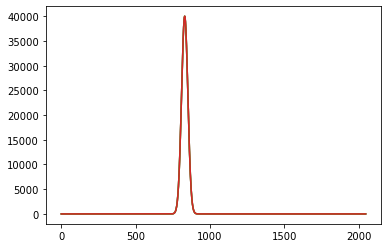

In [307]:
from scipy import signal
l=2000*15
amp=40000
ttlin=1+signal.square(np.arange(l)/15*2*pi)
mod=1+0/2000*ttlin
modsig=amp*np.repeat(spectrum, l).reshape(2048,l)*mod
plot(modsig[:,:50:14])

(0.0, 65000.0)

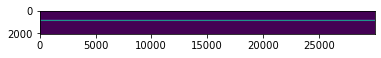

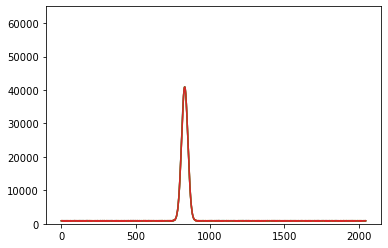

In [308]:
modnoise=modsig+(np.random.random((2048,l))-0.5)*100 + 900# 100 noise dark count 900
modnoise=modnoise.astype(np.ushort) #discretize
imshow(modnoise.astype(np.ushort))
figure()
plot(modnoise[:,:50:14])
ylim(0,65000)

In [309]:
fname=r'\\data\OPENDATA\Instrumentation\Chirality\MChD\MChD-python\sim30000-10.h5'
itime=15
def storeSpectrums(res,ttlin,tstamps):
    with h5py.File(fname, "w") as hf:
        g=hf.create_group('Scan')
        g.create_dataset("Spectrums", data=res,dtype='u2',compression="gzip")
        g.create_dataset("TTLinput", data=ttlin,dtype='i1',compression="gzip")
        g.attrs["Timestamps"]=[str(tstamp) for tstamp in tstamps]
        g.attrs["IntegrationTime"]=itime
storeSpectrums(modnoise,ttlin,[0,1])

In [310]:
sigma,delta=loadMCHD(fname)

Data size=(2048, 30000), 
    Samples pos 15015, 
    Samples neg 14985,
    Dicarded samples 0,
    Edges 1999


{'modulation max': 40.9726, 'modulation energy': 36.08349499999999, 'dc energy': 36040.89847500001, 'Contrast': 998.2190211669912, 'Contrast ': 973.8912063387064, 'Dark count ': 899.5000005333333}


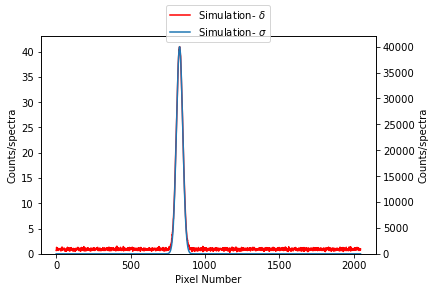

In [311]:
pltMCHD(sigma-900,delta, label='Simulation')
print(statsMCHD(sigma,delta))